In [ ]:
# Exploratory Data Analysis for demographic imbalance. perform EDA using pandas and matplotlib to identify imbalances in demographic attributes in dataset

(4521, 9)
Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'duration',
       'campaign', 'approval'],
      dtype='object')
age          float64
job           object
marital       object
education     object
balance        int64
housing       object
duration     float64
campaign       int64
approval      object
dtype: object
    age          job  marital  education  balance housing  duration  campaign  \
0  30.0   unemployed  married    primary     1787      no      79.0         1   
1  33.0     services  married  secondary     4789     yes     220.0         1   
2  35.0   management   single   tertiary     1350     yes     185.0         1   
3  30.0   management  married   tertiary     1476     yes     199.0         4   
4  59.0  blue-collar  married  secondary        0     yes     226.0         1   

  approval  
0       no  
1       no  
2       no  
3       no  
4       no  

Column: job
job
management       965
blue-collar      946
technician       767
admin.   

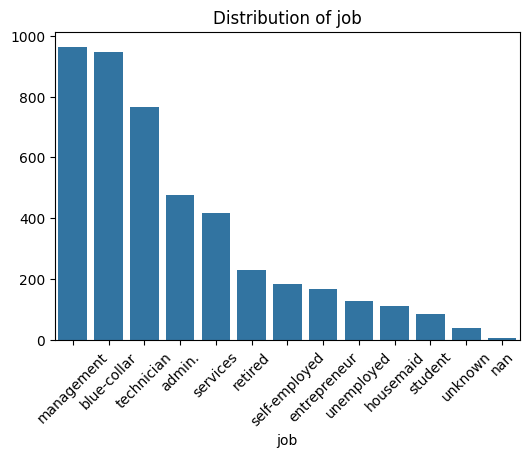


Column: marital
marital
married     2796
single      1194
divorced     528
NaN            3
Name: count, dtype: int64


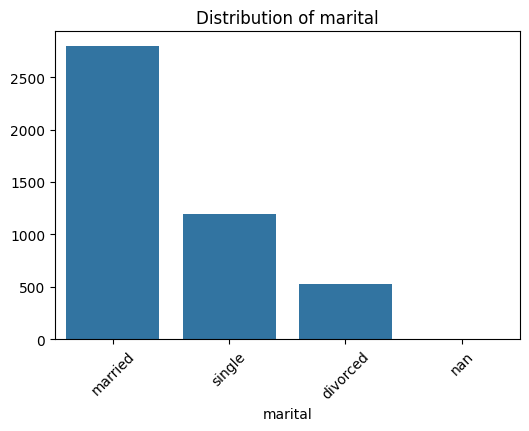


Column: education
education
secondary    2305
tertiary     1348
primary       678
unknown       186
NaN             4
Name: count, dtype: int64


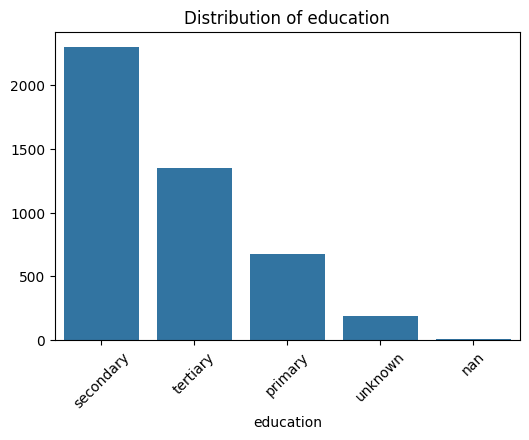


Column: housing
housing
yes    2556
no     1962
NaN       3
Name: count, dtype: int64


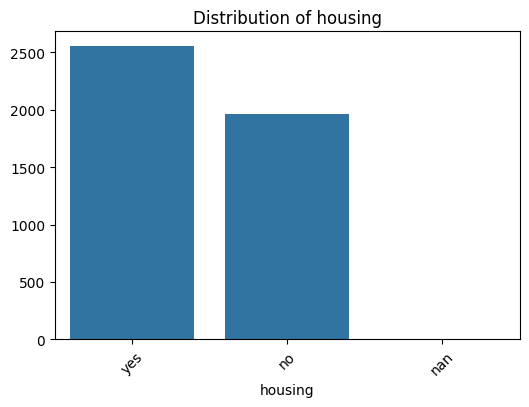


Target distribution by job
approval             no       yes
job                              
admin.         0.878661  0.121339
blue-collar    0.927061  0.072939
entrepreneur   0.910714  0.089286
housemaid      0.875000  0.125000
management     0.864249  0.135751
retired        0.765217  0.234783
self-employed  0.890710  0.109290
services       0.908654  0.091346
student        0.773810  0.226190
technician     0.891786  0.108214
unemployed     0.898438  0.101562
unknown        0.815789  0.184211


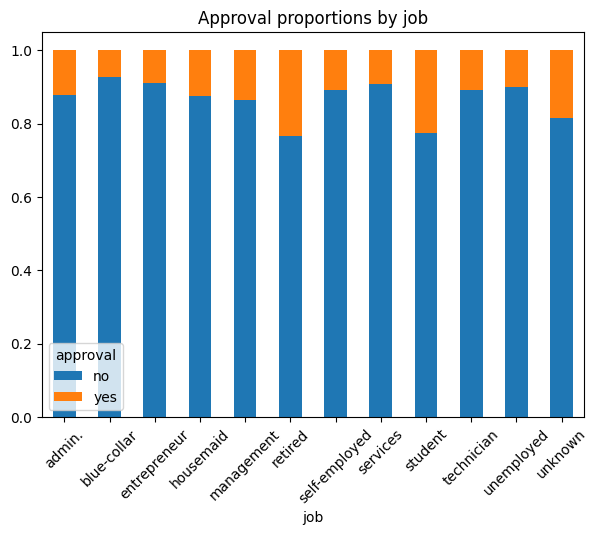


Target distribution by marital
approval        no       yes
marital                     
divorced  0.854167  0.145833
married   0.900930  0.099070
single    0.860972  0.139028


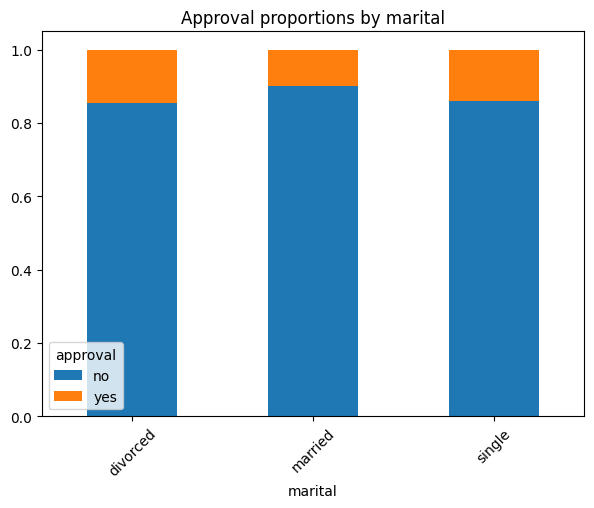


Target distribution by education
approval         no       yes
education                    
primary    0.905605  0.094395
secondary  0.893709  0.106291
tertiary   0.856825  0.143175
unknown    0.897849  0.102151


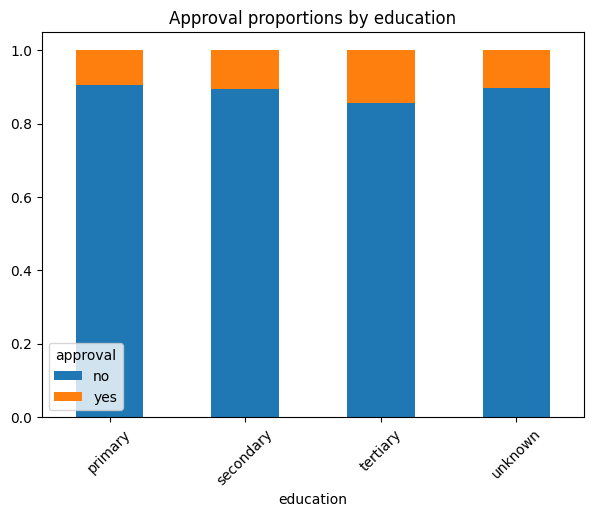


Target distribution by housing
approval        no       yes
housing                     
no        0.846585  0.153415
yes       0.913928  0.086072


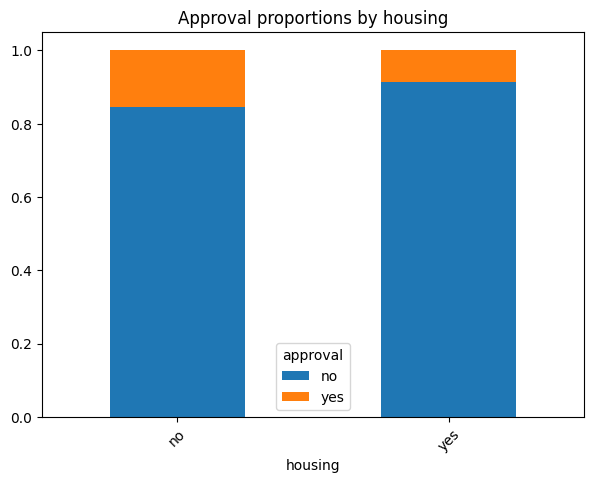


Missing in demographic cols:
job          6
marital      3
education    4
housing      3
dtype: int64

Rare groups in job (<5%):
job
self-employed    0.040532
entrepreneur     0.037209
unemployed       0.028350
housemaid        0.024806
student          0.018605
unknown          0.008416
Name: proportion, dtype: float64

Rare groups in marital (<5%):
Series([], Name: proportion, dtype: float64)

Rare groups in education (<5%):
education
unknown    0.041178
Name: proportion, dtype: float64

Rare groups in housing (<5%):
Series([], Name: proportion, dtype: float64)


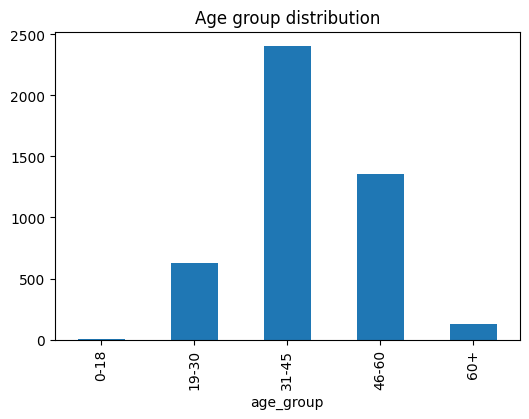


Approval distribution by age group
approval         no       yes
age_group                    
0-18       1.000000  0.000000
19-30      0.857369  0.142631
31-45      0.902581  0.097419
46-60      0.891353  0.108647
60+        0.629921  0.370079


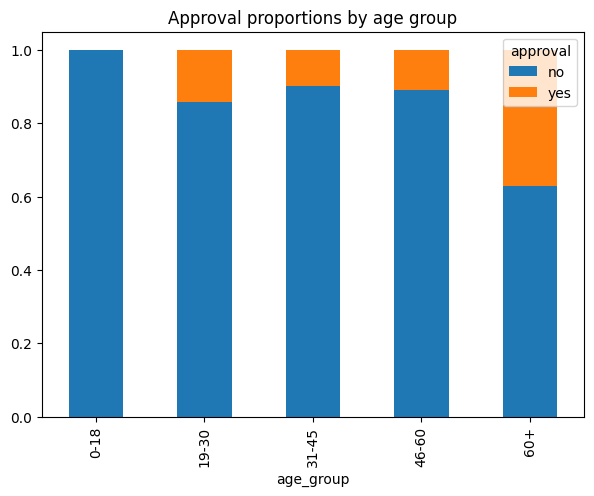

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Credit.csv")

# Quick overview
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.head())

# Demographic columns (based on dataset)
demogs = ['job', 'marital', 'education', 'housing']
target = 'approval'

# 1. Distribution of demographic features
for col in demogs:
    counts = df[col].value_counts(dropna=False)
    print(f"\nColumn: {col}")
    print(counts)
    plt.figure(figsize=(6,4))
    sns.barplot(x=counts.index.astype(str), y=counts.values)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 2. Distribution of target by demographic group
for col in demogs:
    ct = pd.crosstab(df[col], df[target], normalize='index')
    print(f"\nTarget distribution by {col}")
    print(ct)
    ct.plot(kind='bar', stacked=True, figsize=(7,5))
    plt.title(f"Approval proportions by {col}")
    plt.xticks(rotation=45)
    plt.show()

# 3. Missingness check
missing = df[demogs].isnull().sum()
print("\nMissing in demographic cols:")
print(missing)

# 4. Rare groups (<5% of data)
for col in demogs:
    vc = df[col].value_counts(normalize=True)
    rare = vc[vc < 0.05]
    print(f"\nRare groups in {col} (<5%):")
    print(rare)

# 5. Age distribution (binning into groups)
df['age_group'] = pd.cut(df['age'], bins=[0,18,30,45,60,100],
                          labels=['0-18','19-30','31-45','46-60','60+'])
plt.figure(figsize=(6,4))
df['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title("Age group distribution")
plt.show()

# Approval rate by age group
ct_age = pd.crosstab(df['age_group'], df[target], normalize='index')
print("\nApproval distribution by age group")
print(ct_age)
ct_age.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Approval proportions by age group")
plt.show()
